<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/Ensmallen_Automatic_Graph_Retrieval_STRING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensmallen Automatic Graph Retrieval - STRING
In this tutorial we will explore how to use the graphs that can be automatically retrieved by [Ensmallen](https://github.com/AnacletoLAB/ensmallen) from the [STRING](https://string-db.org/) graph repository.

## Installing GraPE
In order to install the [GraPE library](https://github.com/AnacletoLAB/grape), which includes the [Ensmallen](https://github.com/AnacletoLAB/ensmallen) (efficient graph data structure) and [Embiggen](https://github.com/monarch-initiative/embiggen) (graph machine learning) modules, run:

```bash
pip install grape
```

## Installing Ensmallen
In order to install the Ensmallen graph library exclusively (for instance if you want to avoid having dependencies to TensorFlow) just run:

```bash
pip install ensmallen
```

In [1]:
!pip install -qU grape

You should consider upgrading via the '/Users/lucacappelletti/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


## Which STRING graphs are available?
To get a list of all the STRING graphs currently available from Ensmallen, we can quickly get the dataframe with all of the graphs data and query it. Note that for most graphs, multiple versions will be available from different version of STRING and, fom a given version of the library, multiple versions of the graph for an organism will be available.

In [2]:
from grape.datasets import get_all_available_graphs_dataframe

In [3]:
available_graphs = get_all_available_graphs_dataframe()
available_graphs[available_graphs.repository == "string"]

Parsing repositories:   0%|                                                                                   …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

Parsing graphs:   0%|                                                                                         …

,repository,name,version
583,string,SynechocystisSpPcc7509,homology.v11.0
584,string,SynechocystisSpPcc7509,homology.v11.5
585,string,SynechocystisSpPcc7509,physical.links.v11.0
586,string,SynechocystisSpPcc7509,physical.links.v11.5
587,string,SynechocystisSpPcc7509,links.v11.0
...,...,...,...
76168,string,EnterococcusCasseliflavus,links.v11.0
76169,string,EnterococcusCasseliflavus,links.v11.5
76170,string,SalinimicrobiumCatena,homology.v11.5
76171,string,SalinimicrobiumCatena,physical.links.v11.5


## How to load up a graph
To retrieve one of the available STRING graphs, for instance Homo Sapiens, as per any other repository, you can use:

In [4]:
from grape.datasets.string import HomoSapiens

In [5]:
graph = HomoSapiens()

We filter the graph at an edge weight of 700.

In [24]:
graph = graph.filter_from_names(min_edge_weight=700)

Let's get the graph report:

In [25]:
graph

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>HomoSapiens</h2><p class="paragraph">The undirected graph HomoSapiens has 19.57K heterogeneous nodes and 252.98K edges. The graph contains 2.85K connected components (of which 2.75K are disconnected nodes), with the largest one containing 16.58K nodes and the smallest one containing a single node. The RAM requirements for the nodes and edges data structures are 2.67MB and 782.89KB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 747, the mode degree is 0, the mean degree is 25.86 and the node degree median is 9.</p><p class="paragraph">The nodes with the highest degree centrality are 9606.ENSP00000272317 (degree 747 and node types BTO:0000000, BTO:0000042, BTO:0000058, BTO:0000080, BTO:0000081 and other 907), 9606.ENSP00000269305 (degree 723 and node types BTO:0000000, BTO:0000003, BTO:0000018, BTO:0000042, BTO:0000058 and other 1.35K), 9606.ENSP00000388107 (degree 669 and node types BTO:0000000, BTO:0000042, BTO:0000047, BTO:0000080, BTO:0000081 and other 884), 9606.ENSP00000441543 (degree 620 and node types BTO:0000000, BTO:0000020, BTO:0000042, BTO:0000058, BTO:0000080 and other 869) and 9606.ENSP00000362680 (degree 572 and node types BTO:0000000, BTO:0000042, BTO:0000089, BTO:0000131, BTO:0000132 and other 1.17K).</p><h3 style="margin: 1em 0 0 0;">Weights</h3><p class="paragraph">The minimum edge weight is 700, the maximum edge weight is 999 and the total edge weight is 437919420. The RAM requirement for the edge weights data structure is 2.02MB.</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 62.23K node types, of which the 10 most common are GO:0110165 (17.79K nodes, 90.91%), GO:0009987 (15.02K nodes, 76.79%), BTO:0000000 (14.94K nodes, 76.37%), BTO:0000042 (14.89K nodes, 76.13%), GO:0005622 (14.28K nodes, 72.96%), GOCC:0110165 (13.85K nodes, 70.80%), GO:0043226 (13.52K nodes, 69.07%), BTO:0001489 (12.62K nodes, 64.49%), GO:0043229 (12.53K nodes, 64.03%) and GO:0005488 (12.52K nodes, 63.97%). The node types are multi-label, and the node with most node types has 1379 node types. The RAM requirement for the node types data structure is 19.13MB.</p><h4 style="margin: 1em 0 0 0;">Approximated isomorphic node types</h4><p class="paragraph">Approximated isomorphic node types groups are node types describing exactly the same set of nodes. Since the graph has a high number of node types (> 50.00K) we use an approximated version of the node types isomorphisms detection. Note that hash collisions and false positives are possible. It is possible to execute the exact computation with the <code>get_isomorphic_node_type_ids_groups</code> method. The presence of such duplicated node types suggests a potential modelling error in the pipeline that has produced this graph. 9.34K isomorphic node types groups were detected in this graph.</p><ol><li><p class="paragraph">Isomorphic node type group containing 3 node types (5.86K nodes, 29.93%), wh

## Some example operations on the graph
Here follows some examples of operations that can be executed on the graph object.

### How to easily find a method
The library includes a user recommender system to help you find any method, for instance suppose you want to compute the diameter and do not know the method name, or maybe are distracted and mistype it:

In [7]:
graph.djametr

AttributeError: The method 'djametr' does not exists, did you mean one of the following?
* 'get_diameter'
* 'get_diameter_naive'
* 'get_laplacian_transformed_graph'
* 'get_laplacian_coo_matrix_edges_number'
* 'get_left_normalized_laplacian_transformed_graph'
* 'get_right_normalized_laplacian_transformed_graph'
* 'get_symmetric_normalized_laplacian_transformed_graph'
* 'get_symmetric_normalized_transformed_graph'
* 'is_unchecked_connected_from_node_id'
* 'is_connected_from_node_id'

Additionally, generally speaking you can alway use the `dir` method to search for a method:

In [26]:
dir(graph)

['__and__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_repr_html_',
 'add_edge_type_name_inplace',
 'add_node_type_id_from_node_name_prefixes',
 'add_node_type_id_from_node_name_prefixes_inplace',
 'add_node_type_name_from_node_name_prefixes',
 'add_node_type_name_from_node_name_prefixes_inplace',
 'add_node_type_name_inplace',
 'add_selfloops',
 'approximated_vertex_cover_set',
 'are_nodes_remappable',
 'build_bipartite_graph_from_edge_node_ids',
 'build_bipartite_graph_from_edge_node_names',
 'build_bipartite_graph_from_edge_node_prefixes',
 'build_bipartite_graph_from_edge_node_types',
 

Finally, to see a method documentation you can use:

In [27]:
help(graph.get_node_degrees)

Help on built-in function get_node_degrees:

get_node_degrees() method of builtins.Graph instance
    Returns the unweighted degree of every node in the graph



### Enabling time-memory tradeoffs
The Ensmallen library includes a few time-memory tradeoffs that allow you to choose to spend more memory and get faster execution times. While we do not currently enable these by default because we do not know what you will be doing with the graph object, in most use cases (graphs within a few million nodes) they can be enabled without cornerns.

In [28]:
graph.enable()

### Diameter of the graph
Computing the diameter of the graph using [ifub](https://who.rocq.inria.fr/Laurent.Viennot/road/papers/ifub.pdf).

Since the graph is not connected, it has infinite diameter:

In [29]:
%%time
graph.get_diameter()

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 15 µs


inf

In order to get the diameter of the component with the most central node, you can use:

In [30]:
%%time
graph.get_diameter(ignore_infinity=True)

CPU times: user 150 ms, sys: 46.3 ms, total: 196 ms
Wall time: 21.5 ms


14.0

### Connected components
Compute the connected components of the graph:

In [31]:
%%time
(component_ids, components_number, minimum_component_size, maximum_component_size) = graph.get_connected_components()

CPU times: user 40.7 ms, sys: 17.4 ms, total: 58.1 ms
Wall time: 7.07 ms


## Compute the graph node embedding

In [32]:
from grape import get_available_models_for_node_embedding

The node embedding methods currently supported can be retrieved as follows:

In [33]:
get_available_models_for_node_embedding()

,model_name,task_name,library_name,available,requires_node_types,can_use_node_types,requires_edge_types,requires_edge_weights,can_use_edge_weights,requires_positive_edge_weights
0,GloVe,Node Embedding,Ensmallen,True,False,True,False,False,True,True
1,SkipGram,Node Embedding,Ensmallen,True,False,True,False,False,True,True
2,SkipGram,Node Embedding,TensorFlow,True,False,True,False,False,True,True
3,TransE,Node Embedding,Ensmallen,True,False,False,True,False,True,False
4,TransE,Node Embedding,TensorFlow,True,False,False,True,False,False,False
5,TransE,Node Embedding,PyKeen,True,False,False,True,False,False,False
6,WeightedSPINE,Node Embedding,Ensmallen,True,False,False,False,True,True,True
7,SPINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False
8,KGTransE,Node Embedding,Ensmallen,True,False,True,True,False,False,False
9,KGTransE,Node Embedding,TensorFlow,True,True,True,True,False,False,False


Let's use GloVe:

In [34]:
from grape.embedders import GloVeEnsmallen

model = GloVeEnsmallen(epochs=50)
node_embedding = model.fit_transform(graph).get_node_embedding_from_index(0)

/Users/lucacappelletti/opt/miniconda3/lib/python3.7/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:152: UserWarning: Please be advised that the HomoSapiens graph contains 2752 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  f"Please be advised that the {graph.get_name()} graph "


Let's take a look at the node embedding:

In [35]:
node_embedding

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
9606.ENSP00000000233,-1.301808,0.141057,0.342941,0.848580,-0.247111,0.015176,2.364999,0.472028,2.052887,-0.538196,...,-1.870172,-1.335142,0.691217,0.636013,-0.103137,-1.875638,-0.578580,0.800445,-0.442342,-2.045343
9606.ENSP00000000412,-0.494283,1.053166,-0.213271,1.335909,-1.375375,-1.589895,0.719043,-0.122105,1.006205,-0.979057,...,-1.833365,-0.573823,0.491126,-0.103813,-0.510772,-0.129081,0.780335,1.323661,-1.815701,-2.051811
9606.ENSP00000001008,0.483548,1.168685,0.787759,0.774616,0.147425,-1.510744,1.425598,0.138770,0.071201,0.541837,...,-0.801040,-0.807425,0.088572,0.895504,-1.565757,-1.646160,-0.090160,1.125425,-0.908312,-2.275345
9606.ENSP00000001146,0.839119,1.571983,1.727545,2.117456,-0.814562,-0.468977,-0.261351,1.852488,1.208457,-0.125002,...,-2.551798,0.354014,0.086091,-0.260526,-0.041010,-0.494800,-2.112398,-0.852303,-1.267719,-1.206242
9606.ENSP00000002125,-1.448091,-0.490221,0.028545,0.472525,0.446364,0.776062,-0.011563,1.028655,0.792373,-0.546708,...,1.127515,0.541973,0.643322,1.213207,-1.249032,-0.838478,0.202244,0.274425,-1.268539,-1.458343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606.ENSP00000485671,0.654965,-0.408863,0.687855,-0.450453,-0.713454,0.385945,0.779719,-0.054947,0.490885,-0.758402,...,0.209907,-0.640782,-0.081261,-0.449538,-0.526512,-0.912468,0.434553,0.430063,-0.915195,-0.348439
9606.ENSP00000485672,0.456496,0.854887,0.156510,-0.192613,-0.434294,-0.104357,0.257291,0.573841,-0.609560,-0.338530,...,0.455977,0.311203,-0.547325,-0.044751,-0.275546,0.266668,-0.720696,-0.562341,-0.751262,-0.688655
9606.ENSP00000485673,0.010201,-0.614245,0.985664,-0.028962,0.259355,-0.809966,-0.250396,0.962933,-0.168437,-0.265660,...,0.125337,-0.686517,-0.590131,0.428007,-0.089599,0.452862,-0.272931,0.806126,-0.272226,0.792120
9606.ENSP00000485675,0.729900,-0.359185,0.997648,-0.528476,0.360412,-0.125517,-0.410841,-0.375049,-0.944614,-0.539348,...,0.417158,-0.980401,-0.619780,0.151382,0.089079,-0.646047,0.128313,-0.368950,-0.321140,0.764964


### Visualizing the computed node embedding
We can use the visualizer, transforming the node embedding using a TSNE, to get a visualization of its node degrees and edge types:

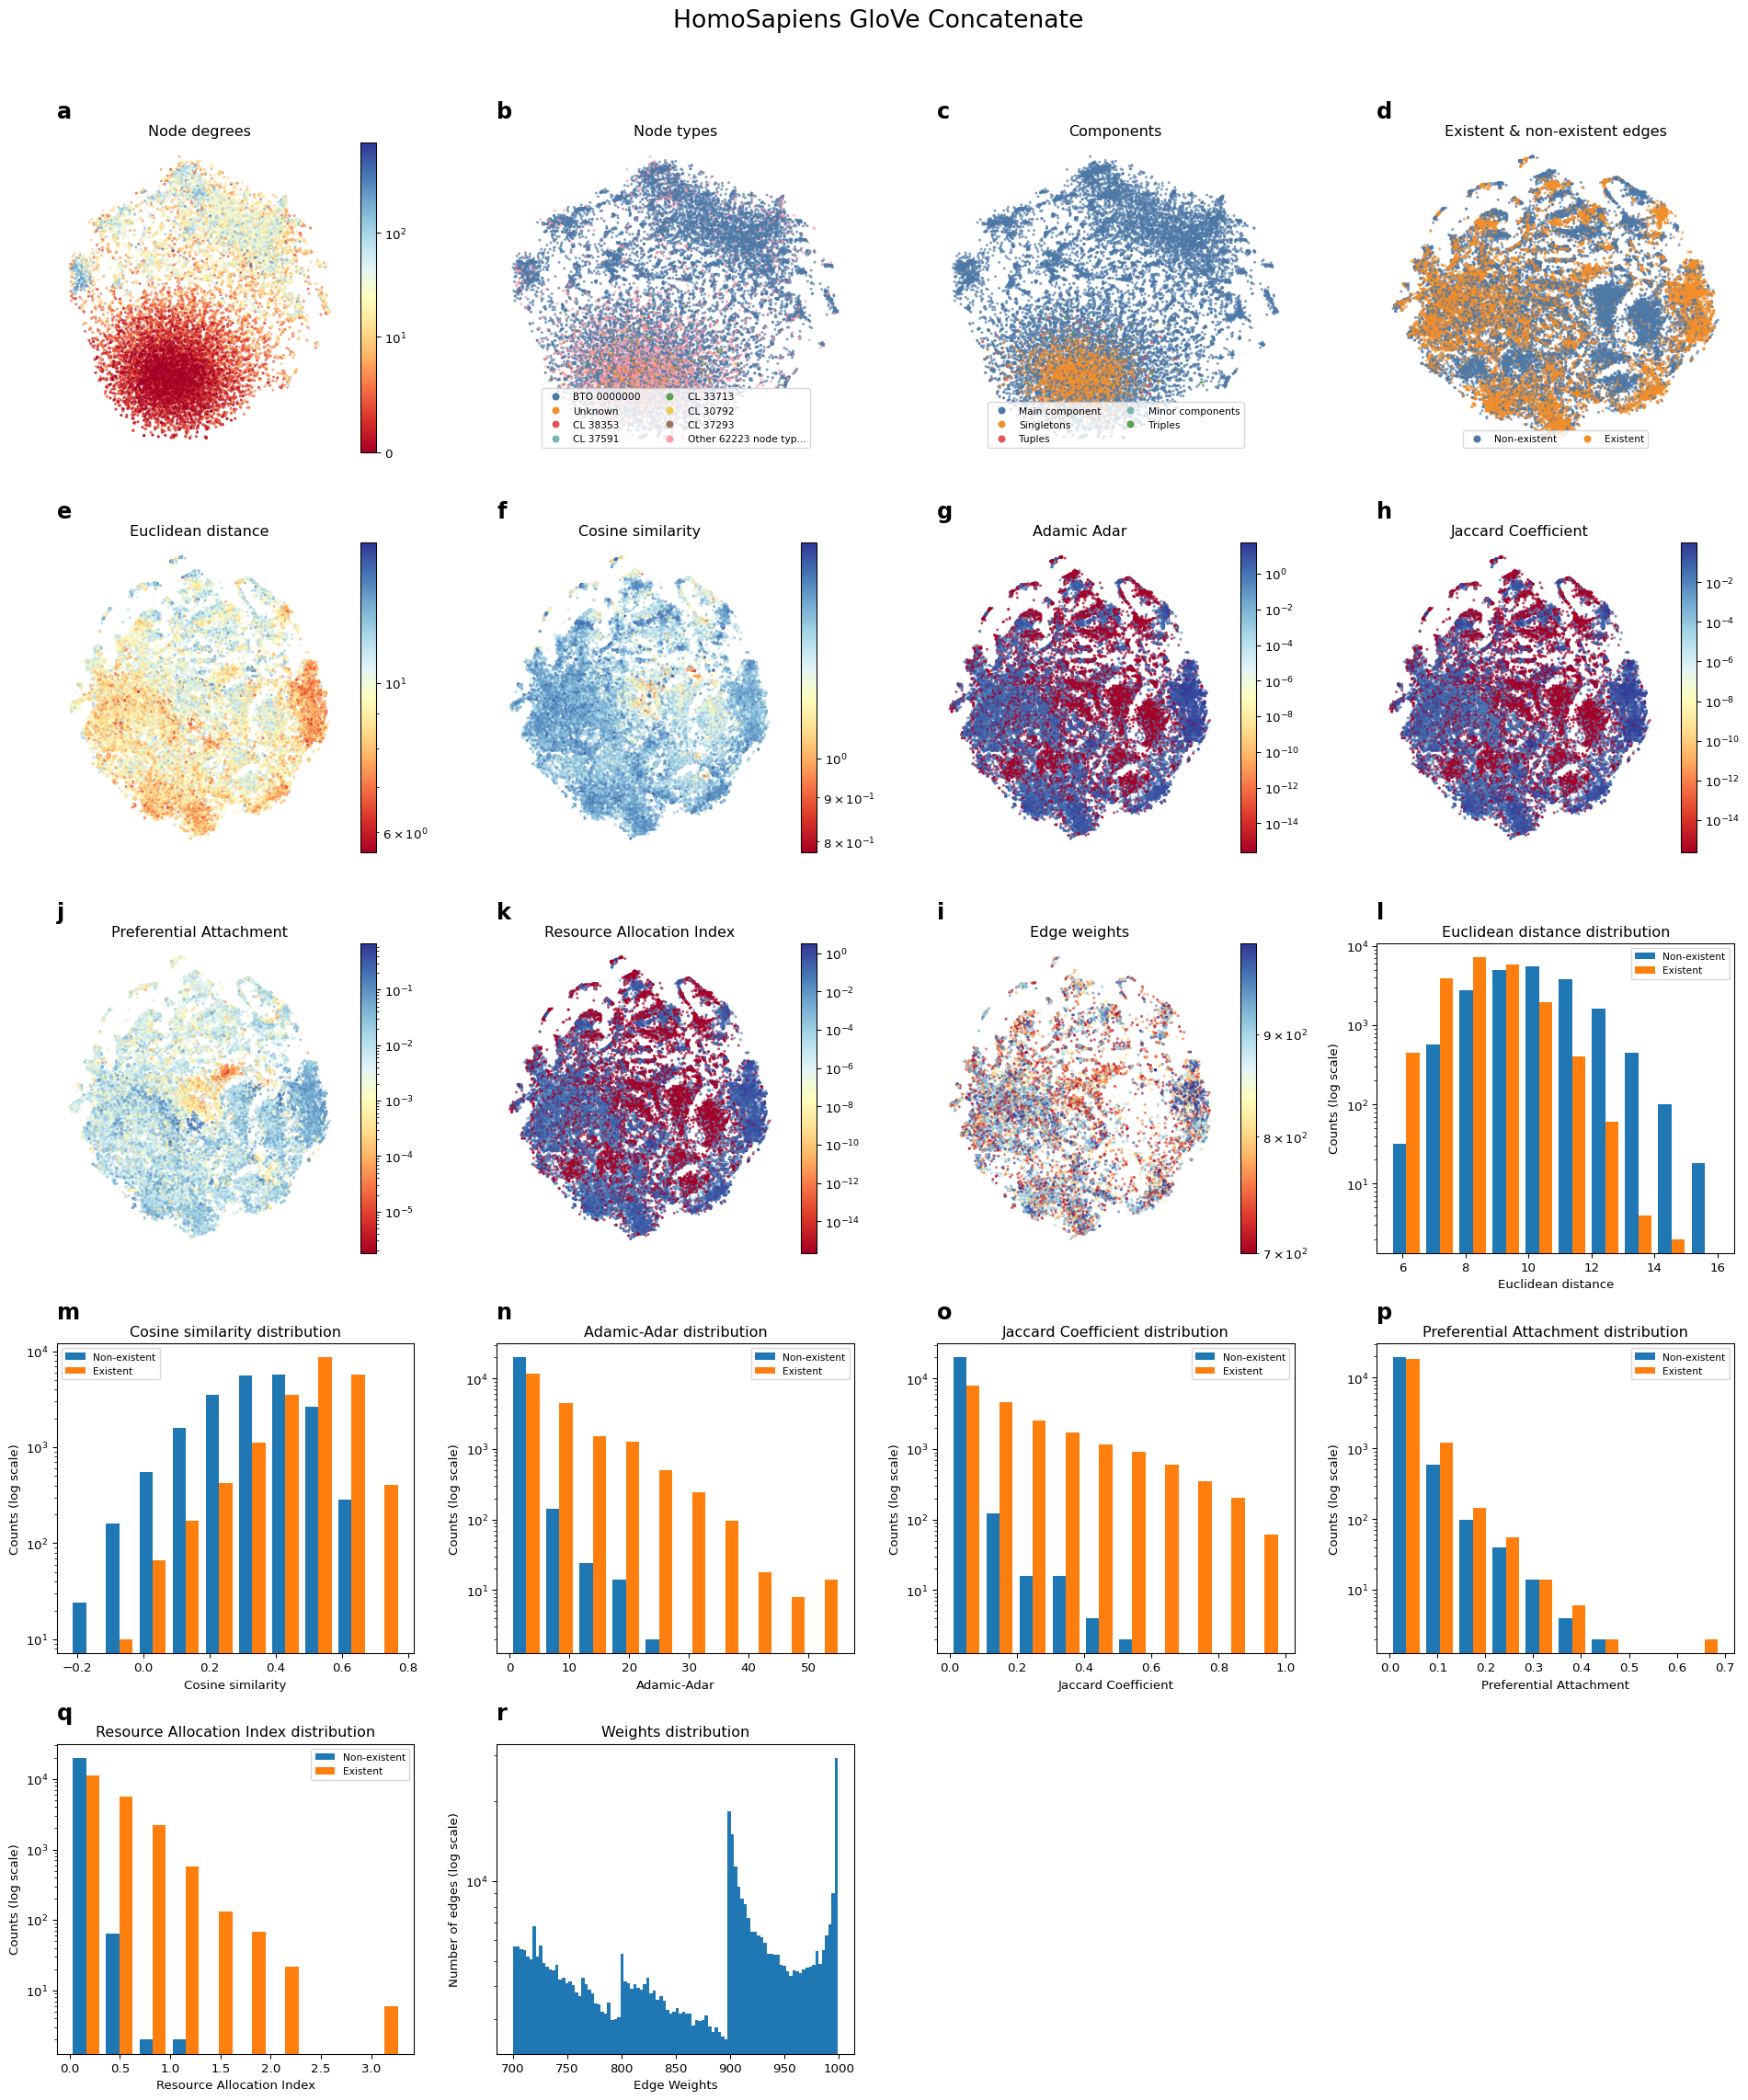

In [36]:
from grape import GraphVisualizer

GraphVisualizer(
    graph,
    node_embedding_method_name="GloVe",
    decomposition_kwargs=dict(metric="cosine")
).fit_and_plot_all(node_embedding)

*Would you like this tutorial to include some more sections? Please do let us know [by opening a issue in the GraPE repository](https://github.com/AnacletoLAB/grape/issues/new).*